In [149]:
import os
from pathlib import Path
from astropy.io import fits
import numpy as np

#pad naar de betreffende metingen, deze moet veranderd worden
path = "../data/"
files =  [ p for p in Path(path).glob('*.fit') ]

data_dict = dict()
for file in files:
    data_dict[os.path.basename(file)] = fits.getdata(file)

In [150]:
data_headers = dict()
for x in data_dict.keys():
    data_headers[x] = fits.getheader(path + x)

In [151]:
data_dict['neon-0001.fit']

array([[ 992, 1055, 1034, ...,  730,  836,  313],
       [1068,  971,  967, ...,  756,  747,  342],
       [1015, 1030, 1043, ...,  738,  764,  331],
       ...,
       [ 992, 1063,  950, ...,  886,  914,  298],
       [1025, 1037, 1066, ...,  901,  899,  311],
       [1047, 1007, 1106, ...,  968,  935,  304]], dtype=uint16)

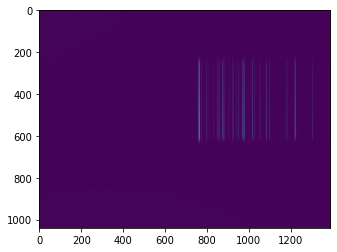

In [152]:
import matplotlib.pyplot as plt 
plt.imshow(data_dict['neon-0001.fit'])

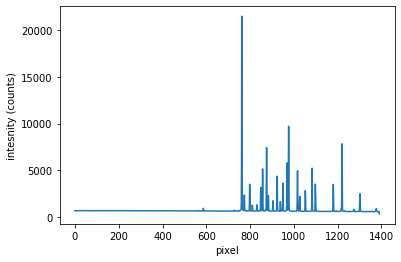

In [153]:
stack = np.median([x for x in data_dict.values()], axis=0)
spectrum = np.median(stack[0:700], axis=0)
#plt.xticks(range(0, 1500, 100))
plt.xlabel('pixel')
plt.ylabel('intesnity (counts)')
plt.plot(spectrum)

(700.0, 800.0)

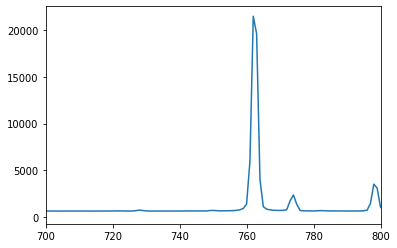

In [154]:
crop1 = np.median(spectrum[0:700], axis=0)
crop1

plt.plot(spectrum)
plt.xlim(700, 800)

In [155]:
#determining the minimal values
from scipy.signal import argrelextrema

maxima = argrelextrema(spectrum, np.greater)
len(maxima[0])

324

In [156]:
for i in maxima[0]:
    print(f'{i} : {spectrum[i]}')

1 : 656.25
3 : 654.5
6 : 655.0
10 : 652.25
12 : 652.5
15 : 653.25
17 : 656.0
23 : 659.25
28 : 661.0
31 : 661.5
34 : 663.5
37 : 662.25
39 : 663.5
41 : 663.25
45 : 664.5
47 : 666.0
50 : 665.0
54 : 665.25
56 : 665.5
58 : 666.75
61 : 664.5
65 : 663.5
72 : 662.5
74 : 662.75
79 : 661.5
83 : 660.0
85 : 660.5
87 : 661.0
89 : 660.5
95 : 660.0
100 : 662.0
102 : 662.0
105 : 661.0
108 : 662.0
111 : 665.25
113 : 667.0
117 : 666.0
121 : 662.0
124 : 663.0
126 : 661.0
130 : 661.5
132 : 662.0
135 : 661.0
144 : 661.25
147 : 663.0
149 : 661.5
153 : 660.5
156 : 663.25
159 : 661.0
164 : 661.0
169 : 676.5
174 : 665.25
179 : 660.0
184 : 661.25
186 : 659.5
189 : 661.75
195 : 660.5
197 : 659.5
200 : 659.5
202 : 660.5
204 : 659.25
207 : 659.5
211 : 661.0
214 : 658.5
216 : 659.0
219 : 660.0
221 : 659.75
223 : 658.0
226 : 659.0
230 : 659.0
235 : 658.5
239 : 659.25
246 : 656.75
248 : 658.0
250 : 659.5
252 : 658.25
257 : 655.5
262 : 655.25
265 : 656.0
272 : 657.25
275 : 657.25
277 : 656.75
280 : 656.25
284 : 657.5


In [157]:
from scipy.signal import find_peaks, peak_prominences

peaks, _ = find_peaks(spectrum)
peaks

array([   1,    3,    6,   10,   12,   15,   17,   23,   28,   31,   34,
         37,   39,   41,   45,   47,   50,   54,   56,   58,   61,   65,
         68,   72,   74,   79,   83,   85,   87,   89,   95,  100,  102,
        105,  108,  111,  113,  117,  121,  124,  126,  130,  132,  135,
        140,  144,  147,  149,  153,  156,  159,  164,  169,  174,  179,
        184,  186,  189,  195,  197,  200,  202,  204,  207,  211,  214,
        216,  219,  221,  223,  226,  230,  235,  239,  242,  246,  248,
        250,  252,  257,  259,  262,  265,  272,  275,  277,  280,  284,
        289,  291,  295,  298,  301,  303,  307,  311,  314,  316,  322,
        325,  327,  330,  332,  337,  339,  341,  344,  346,  348,  350,
        353,  356,  359,  362,  366,  370,  374,  376,  378,  381,  383,
        387,  390,  393,  396,  399,  402,  404,  409,  411,  414,  417,
        422,  426,  431,  435,  439,  442,  445,  452,  456,  461,  465,
        467,  471,  475,  478,  482,  484,  487,  4

In [158]:
prominences = peak_prominences(spectrum, peaks)[0]
len(prominences)

342

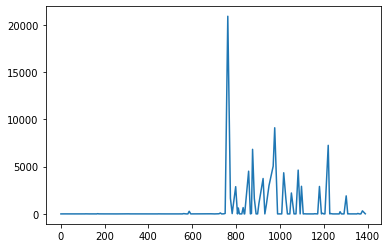

In [159]:
plt.plot(peaks, prominences)

In [160]:
filtered_peaks = []
filtered_pixel = []
n=0
k=0
for i in prominences:
    if i > k:
        k=i
        j = peaks[n]
        filtered_peaks.append(j)

    n+=1

k, j
#dit is eigenlijk om van het aantal counts naar de distributie te gaan (spectral irradiance)
# deze is waarschijnlij niet correct en dient veranderd te worden

(20906.75, 762)

In [161]:
#plt.plot()
#plt.xlabel("pixel number")
#plt.ylabel("intensity (counts)")

In [162]:
#dient verder aangepast te worden voor het vergelijken met de bekende neon-golflengtelijnen
#deze lijne zijn in een plaatje weergeven van de opdracht maandag maar is niet in een file gedaan.
# tips: niet alle punten hoeven in de fit voor de ijking, neem slechts een aantal golflengtes/pixel nums

#kan ook met zon & fraunhoverlijnen

neon_lambda_A = [5852.49, 6143.06, 6096.16, 6266.49, 6402.25, 6717.04, 7032.41, 7245.17]


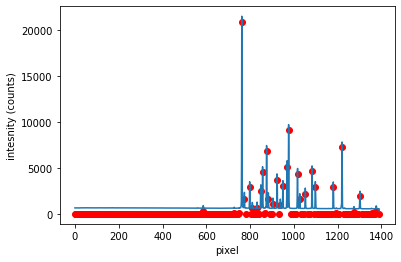

In [163]:
plt.xlabel('pixel')
plt.ylabel('intesnity (counts)')
plt.plot(spectrum)
plt.scatter(peaks, prominences, color="red")

In [164]:
peaks_new = []
prominences_new = []
n=0
for i in prominences:
    if i > 4000:
        prominences_new.append(i)
        peaks_new.append(peaks[n])
    n+=1

peaks_new
    

[762, 857, 875, 969, 976, 1017, 1083, 1220]

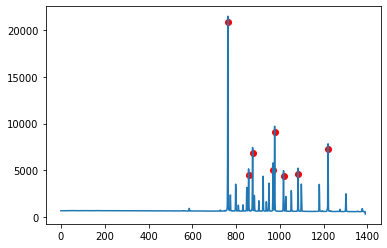

In [165]:
plt.scatter(peaks_new, prominences_new, color="red")
plt.plot(spectrum)

Text(0, 0.5, 'pixel number')

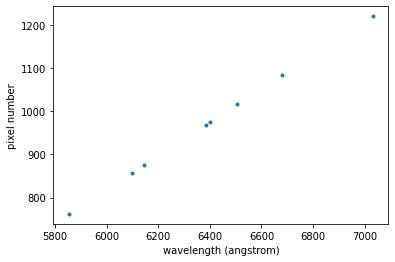

In [166]:
peaks_golf = [5852.49, 6096.16, 6143.06, 6382.99, 6402.25, 6506.53, 6678.28, 7032.41]
plt.plot(peaks_golf, peaks_new, '.')
plt.xlabel("wavelength (angstrom)")
plt.ylabel("pixel number")

In [167]:
from lmfit import models
model = models.LinearModel()
fit = model.fit(peaks_golf, x=peaks_new)
fit

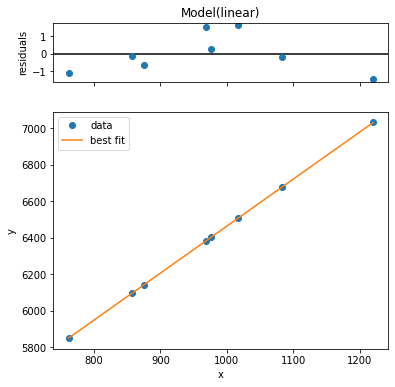

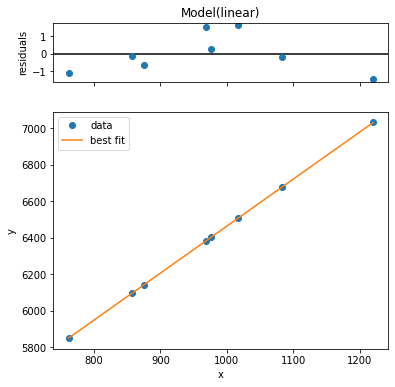

In [168]:
fit.plot()

In [169]:
def pixels_to_wavelenghts(pixel, slope, intercept):
    '''
    This function converts pixel values to wavelengths using a linear model to be determined by a fit.
    '''
    return slope * pixel + intercept

wavelengths = pixels_to_wavelenghts(range(len(spectrum)), fit.values['slope'], fit.values['intercept'])
wavelengths

array([3888.85008086, 3891.42558922, 3894.00109758, ..., 7463.65568239,
       7466.23119075, 7468.8066991 ])